# Data Processing

## Libraries

In [516]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Dataset

In [517]:
dataset = pd.read_csv('data.csv')

In [518]:
dataset.head()

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,M,44,6.8,64,4.9,4.9,2.8,2.0,1.8,1.2,21.0,N
1,F,35,3.9,38,5.4,3.8,5.9,0.5,4.3,1.0,22.0,N
2,M,40,5.0,63,4.0,4.8,2.5,1.1,2.7,1.1,23.0,N
3,F,35,2.8,50,5.0,4.7,2.5,1.3,2.4,1.1,20.0,N
4,F,42,2.1,45,4.9,3.0,1.1,1.1,1.4,1.4,21.0,N


In [519]:
dataset.describe(include='all')

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844
mean,NaN,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,NaN
std,NaN,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,NaN
min,NaN,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,NaN
25%,NaN,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,NaN
50%,NaN,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,NaN
75%,NaN,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,NaN


In [520]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [521]:
print(X)
X.shape

[['M' 44 6.8 ... 1.8 1.2 21.0]
 ['F' 35 3.9 ... 4.3 1.0 22.0]
 ['M' 40 5.0 ... 2.7 1.1 23.0]
 ...
 ['M' 54 5.0 ... 3.0 0.7 33.0]
 ['M' 30 7.1 ... 2.4 8.1 27.4]
 ['M' 31 3.0 ... 2.4 15.4 37.2]]


(1000, 11)

In [522]:
print(y)
y.shape

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y

(1000,)

## Encode Categorical Data

In [523]:
# One Hot Encoding for Independent Variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [524]:
print(X[:, 0:4])

[[0.0 1.0 0.0 44]
 [1.0 0.0 0.0 35]
 [0.0 1.0 0.0 40]
 ...
 [0.0 1.0 0.0 54]
 [0.0 1.0 0.0 30]
 [0.0 1.0 0.0 31]]


In [525]:
# Label Encoder for Dependent Variable
le = LabelEncoder()
y = le.fit_transform(y)

In [526]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

## Training and Test Set Allocation

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1000000)

In [528]:
# print(X_train)

In [529]:
# print(X_test)

In [530]:
# print(y_train)

In [531]:
# print(y_test)

## Feature Scaling

In [532]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])

In [533]:
print(X_train)

[[0.0 1.0 0.0 ... -0.5360979661303736 -0.21176493523210396
  0.2812116799700869]
 [0.0 1.0 0.0 ... -0.2705331208883882 -0.23905423100943693
  0.0795033415774561]
 [1.0 0.0 0.0 ... -0.978706041533683 -0.3482114141187689
  0.3820658491664023]
 ...
 [1.0 0.0 0.0 ... 1.05729110532154 -0.18447563945477094
  0.2812116799700869]
 [1.0 0.0 0.0 ... -0.3590547359690498 0.061128022541225874
  1.4914617103258718]
 [1.0 0.0 0.0 ... 1.3228559505635253 -0.21176493523210396
  -1.3324550271709594]]


In [534]:
print(X_test)

[[0.0 1.0 0.0 ... -0.3104462592647769 -0.34933475964769956
  -0.49658275449064243]
 [0.0 1.0 0.0 ... -1.0711109067741815 0.36612043931568633
  1.7178779822819963]
 [0.0 1.0 0.0 ... -1.3563601495902085 -0.45940479025745123
  1.1139341449803675]
 ...
 [0.0 1.0 0.0 ... 1.0207168738766819 -0.2942997443428237
  -0.09395352962288993]
 [0.0 1.0 0.0 ... 0.06988606448992583 2.2648284673339028
  0.38920154021841274]
 [1.0 0.0 0.0 ... 2.161713845140789 -0.4043697749525754
  -1.3018412042261474]]


# RF Training and Prediction

## Hyperparameter Optimization

In [535]:
# param_grid = [
#     {
#      'n_estimators': [100, 1000, 10000],
#      'max_depth': [50, 75, 100, 150, 200],
#      'bootstrap': [True, False],
#      'criterion': ['gini', 'entropy'] 
#     }
# ]

# optimal_params = GridSearchCV(
#     RandomForestClassifier(),
#     param_grid,
#     cv = 5,
#     scoring = 'accuracy',
#     verbose = 0
# )

In [536]:
# optimal_params.fit(X_train, y_train)

In [537]:
# print(optimal_params.best_params_)

## Training

In [538]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 150, bootstrap = False, criterion = "gini")
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=150)

In [539]:
prediction = rf.predict(X_test)
# prediction = optimal_params.predict(X_test)
prediction

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0])

In [540]:
accuracy = accuracy_score(y_true=y_test, y_pred=prediction)
print(accuracy)

0.965


# Result Evaluation

## Confusion Matrix

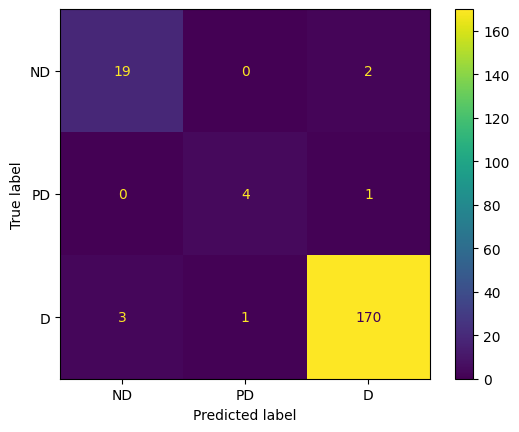

In [541]:
cm = confusion_matrix(y_test, prediction)
cm_fig = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ND', 'PD', 'D'])
cm_fig.plot()
plt.show()

## Classification Report

In [542]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.80      0.80      0.80         5
           2       0.98      0.98      0.98       174

    accuracy                           0.96       200
   macro avg       0.88      0.89      0.89       200
weighted avg       0.97      0.96      0.97       200

